<h3>Simulasi Monte Carlo</h3>

In [ ]:
#Import Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Fungsi untuk simulasi Monte Carlo dengan batasan nilai positif
def monte_carlo_simulation(num_simulations, mean, std_dev):
    results = []
    for _ in range(num_simulations):
        # Menghasilkan biaya tetap dan biaya satuan secara acak (nilai positif)
        fixed_cost = np.abs(np.random.normal(mean, std_dev))
        variable_cost = np.abs(np.random.normal(mean, std_dev))
        # Menghitung total biaya
        total_cost = fixed_cost + variable_cost
        # Menghitung permintaan (nilai positif)
        demand = np.abs(np.random.normal(mean, std_dev))
        # Menghitung selisih biaya
        cost_diff = demand - total_cost
        # Keputusan berdasarkan selisih biaya
        decision = "Terima" if cost_diff > 0 else "Tolak"
        # Menyimpan hasil
        results.append({
            'Fixed Cost': fixed_cost,
            'Variable Cost': variable_cost,
            'Demand': demand,
            'Total Cost': total_cost,
            'Cost Difference': cost_diff,
            'Decision': decision
        })
    return pd.DataFrame(results)
# Parameter simulasi
mean = 1000
std_dev = 50000
num_simulations = 100000  # Jumlah simulasi yang diinginkan
# Menjalankan simulasi
simulation_results = monte_carlo_simulation(num_simulations, mean, std_dev)
# Menampilkan hasil
print(simulation_results.head())  # Tampilkan 5 hasil pertama

     Fixed Cost  Variable Cost        Demand    Total Cost  Cost Difference  \
0  12397.649430   21412.125826  48684.494467  33809.775256     14874.719211   
1  16191.742020   74393.847539  61757.340283  90585.589559    -28828.249276   
2  31569.181431   39695.974058  33199.991511  71265.155489    -38065.163978   
3  38666.292363   52316.462464  66116.079534  90982.754827    -24866.675293   
4  22615.439456    3656.616309  65778.203191  26272.055764     39506.147426   

  Decision  
0   Terima  
1    Tolak  
2    Tolak  
3    Tolak  
4   Terima  


In [37]:
print (simulation_results)

         Fixed Cost  Variable Cost        Demand     Total Cost  \
0      12397.649430   21412.125826  48684.494467   33809.775256   
1      16191.742020   74393.847539  61757.340283   90585.589559   
2      31569.181431   39695.974058  33199.991511   71265.155489   
3      38666.292363   52316.462464  66116.079534   90982.754827   
4      22615.439456    3656.616309  65778.203191   26272.055764   
...             ...            ...           ...            ...   
99995  17218.563299   90559.185181  64581.346872  107777.748480   
99996  42626.877744   13353.844964  34270.131350   55980.722708   
99997   3137.523134   65763.805733  82641.368317   68901.328867   
99998  20292.060045   17807.952614  68446.022759   38100.012659   
99999  17103.003348     668.638091  20341.859624   17771.641439   

       Cost Difference Decision  
0         14874.719211   Terima  
1        -28828.249276    Tolak  
2        -38065.163978    Tolak  
3        -24866.675293    Tolak  
4         39506.147426   

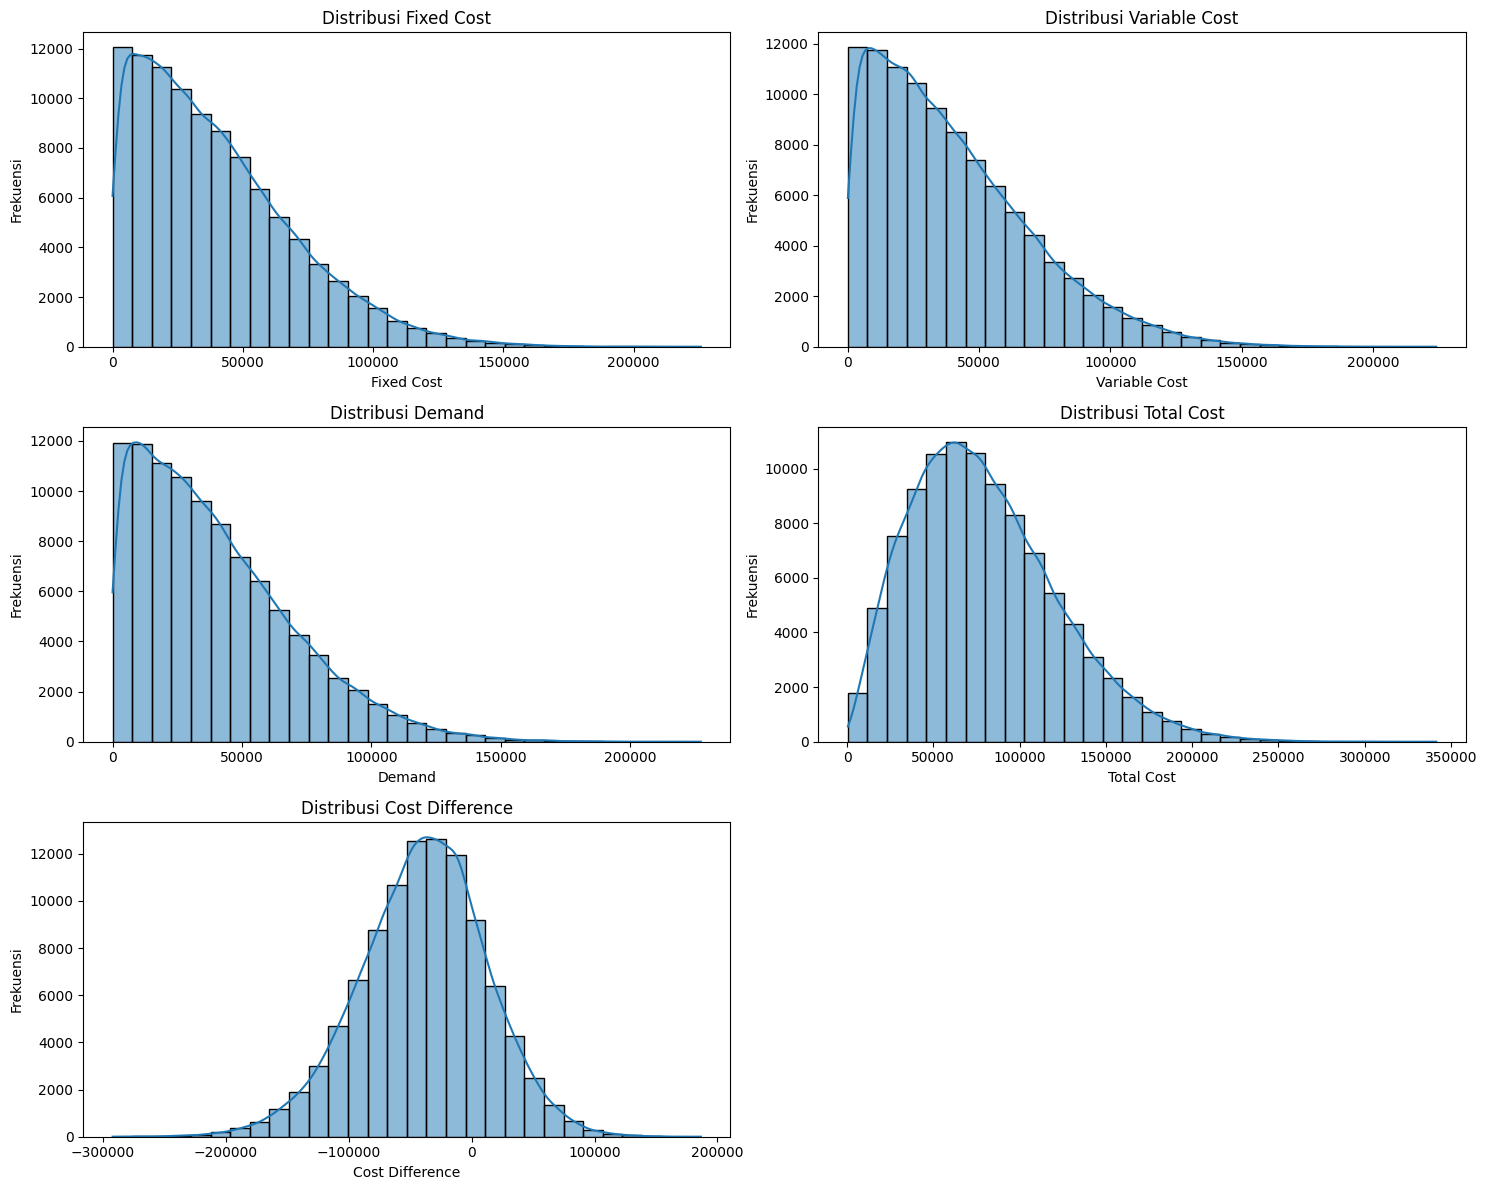

In [ ]:
# Visualisasi distribusi
plt.figure(figsize=(15, 12))

# Histogram untuk Fixed Cost
plt.subplot(3, 2, 1)
sns.histplot(simulation_results['Fixed Cost'], bins=30, kde=True)
plt.title('Distribusi Fixed Cost')
plt.xlabel('Fixed Cost')
plt.ylabel('Frekuensi')

# Histogram untuk Variable Cost
plt.subplot(3, 2, 2)
sns.histplot(simulation_results['Variable Cost'], bins=30, kde=True)
plt.title('Distribusi Variable Cost')
plt.xlabel('Variable Cost')
plt.ylabel('Frekuensi')

# Histogram untuk Demand
plt.subplot(3, 2, 3)
sns.histplot(simulation_results['Demand'], bins=30, kde=True)
plt.title('Distribusi Demand')
plt.xlabel('Demand')
plt.ylabel('Frekuensi')

# Histogram untuk Total Cost
plt.subplot(3, 2, 4)
sns.histplot(simulation_results['Total Cost'], bins=30, kde=True)
plt.title('Distribusi Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frekuensi')

# Histogram untuk Cost Difference
plt.subplot(3, 2, 5)
sns.histplot(simulation_results['Cost Difference'], bins=30, kde=True)
plt.title('Distribusi Cost Difference')
plt.xlabel('Cost Difference')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

<h3>Uji Konvergensi</h3>

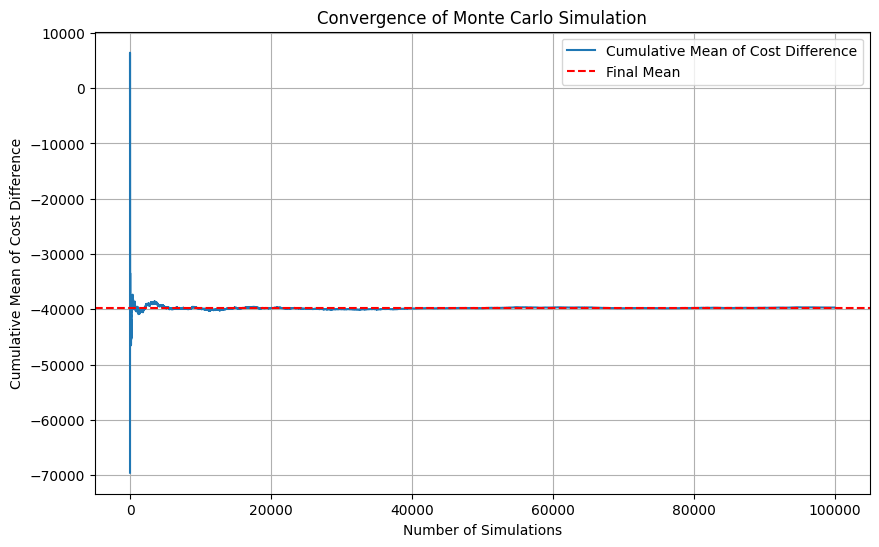

In [ ]:
# Fungsi untuk simulasi Monte Carlo dengan batasan nilai positif
def monte_carlo_simulation(num_simulations, mean, std_dev):
    results = []
    for _ in range(num_simulations):
        # Menghasilkan biaya tetap dan biaya satuan secara acak (nilai positif)
        fixed_cost = np.abs(np.random.normal(mean, std_dev))
        variable_cost = np.abs(np.random.normal(mean, std_dev))
        # Menghitung total biaya
        total_cost = fixed_cost + variable_cost
        # Menghitung permintaan (nilai positif)
        demand = np.abs(np.random.normal(mean, std_dev))
        # Menghitung selisih biaya
        cost_diff = demand - total_cost
        # Keputusan berdasarkan selisih biaya
        decision = "Terima" if cost_diff > 0 else "Tolak"
        # Menyimpan hasil
        results.append({
            'Fixed Cost': fixed_cost,
            'Variable Cost': variable_cost,
            'Demand': demand,
            'Total Cost': total_cost,
            'Cost Difference': cost_diff,
            'Decision': decision
        })
    return pd.DataFrame(results)
# Parameter simulasi
mean = 1000
std_dev = 50000
num_simulations = 100000  # Jumlah simulasi yang diinginkan
# Menjalankan simulasi
simulation_results = monte_carlo_simulation(num_simulations, mean, std_dev)
# Menghitung rata-rata kumulatif dari Cost Difference untuk menguji konvergensi
cumulative_mean = simulation_results['Cost Difference'].expanding().mean()
# Plot untuk melihat konvergensi
plt.figure(figsize=(10, 6))
plt.plot(cumulative_mean, label="Cumulative Mean of Cost Difference")
plt.axhline(y=cumulative_mean.iloc[-1], color='r', linestyle='--', label="Final Mean")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Mean of Cost Difference")
plt.title("Convergence of Monte Carlo Simulation")
plt.legend()
plt.grid()
plt.show()

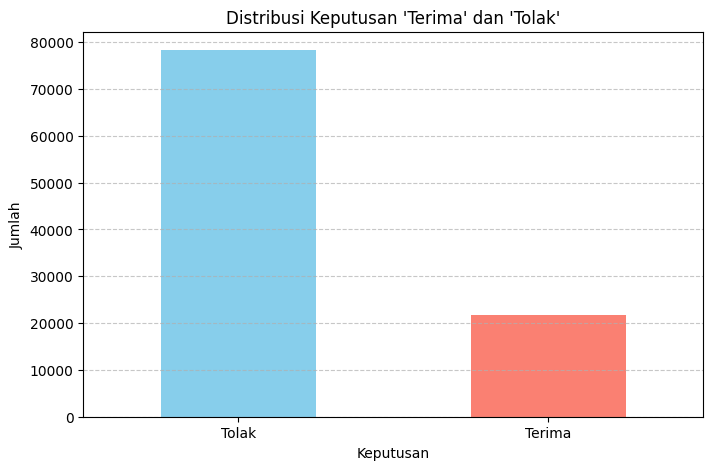

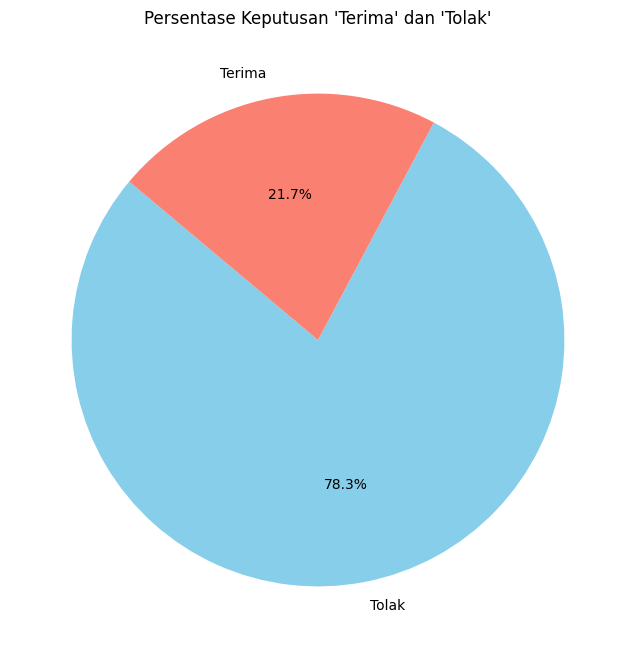

In [40]:
import matplotlib.pyplot as plt

# Menghitung jumlah keputusan "Terima" dan "Tolak"
decision_counts = simulation_results['Decision'].value_counts()

# Menghitung persentase keputusan
decision_percentages = decision_counts / len(simulation_results) * 100

# Visualisasi dengan Bar Chart
plt.figure(figsize=(8, 5))
decision_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribusi Keputusan 'Terima' dan 'Tolak'")
plt.xlabel("Keputusan")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualisasi dengan Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(decision_percentages, labels=decision_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title("Persentase Keputusan 'Terima' dan 'Tolak'")
plt.show()